In [906]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [907]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [908]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [910]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [911]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [912]:
def find_outliers(df):
  df=df.select_dtypes(include='number')
  outliers=[]
  no_outliers=[]
  for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier conditions
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers.append(outlier)
  return outliers

In [913]:
outliers=find_outliers(df)
outliers

[Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
      Unit price  Quantity  Tax 5%     Total   cogs  gross margin percentage  \
 166       95.58        10  47.790  1003.590  955.8                 4.761905   
 167       98.98        10  49.490  1039.290  989.8                 4.761905   
 350       99.30        10  49.650  1042.650  993.0                 4.761905   
 357       95.44        10  47.720  1002.120  954.4                 4.761905   
 422       97.21        10  48.605  1020.705  972.1                 4.761905   
 557       98.52        10  49.260  1034.460  985.2                 4.761905   
 699       97.50        10  48.750  1023.750  975.0                 4.761905   
 792       97.37        10  48.685  1022.385  973.7                 4.761905   
 996       97.38    

In [914]:
def remove_outliers(df):
    df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for col in df_cleaned.select_dtypes(include=[np.number]):  # Loop through numerical columns
        Q1 = df_cleaned[col].quantile(0.25)  # 25th percentile
        Q3 = df_cleaned[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned  # Return DataFrame without outliers

df_cleaned = remove_outliers(df)
df_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [915]:
outliers=find_outliers(df_cleaned)
outliers

[Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating]
 Index: [],
 Empty DataFrame
 Columns: [Unit price, Quantity, Tax 5%, Total, cogs, gross margin percen

In [916]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


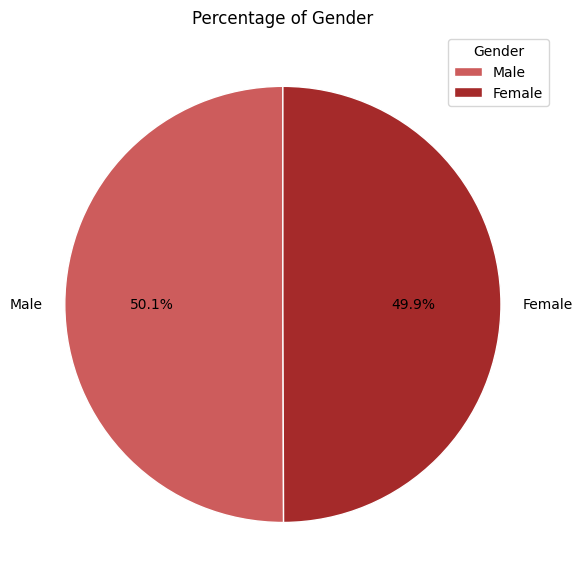

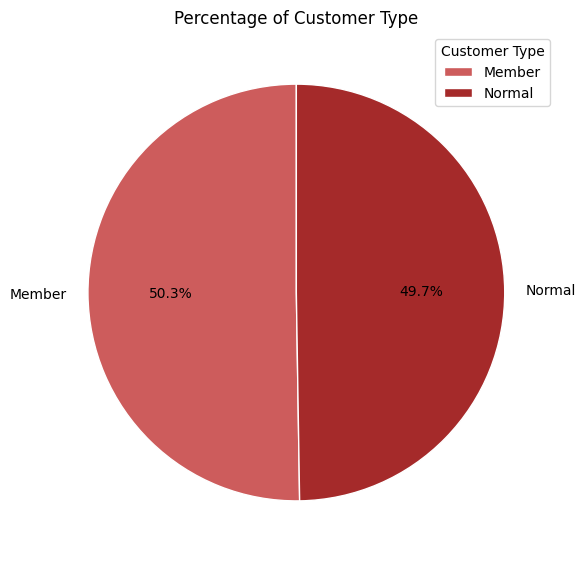

In [917]:
# Plotting Gender Distribution
plt.figure(figsize=(6, 6))
df_cleaned['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['indianred', 'brown'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Percentage of Gender')
plt.ylabel('')  # Removes y-axis label
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Plotting Customer Type Distribution
plt.figure(figsize=(6, 6))
df_cleaned['Customer type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['indianred', 'brown'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Percentage of Customer Type')
plt.ylabel('')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


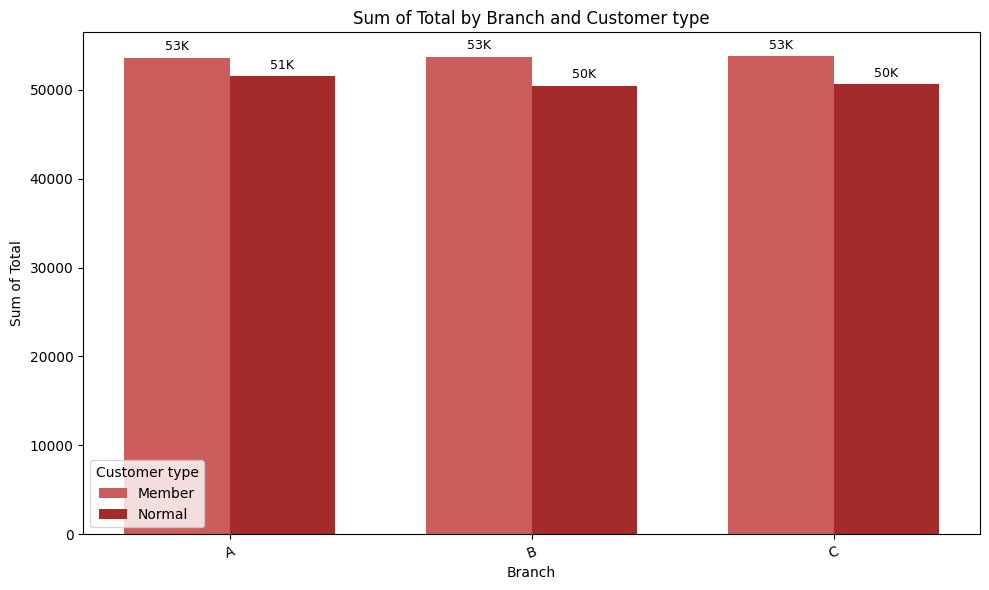

In [918]:
# Step 2: Group by 'Product line' and 'Gender', then sum the 'Total'
grouped = df_cleaned.groupby(['Branch', 'Customer type'])['Total'].sum().unstack()

# Step 3: Plot the grouped data
Branchs = grouped.index
x = np.arange(len(Branchs))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, grouped['Member'], width=bar_width, label='Member', color='indianred')
bars2 = ax.bar(x + bar_width/2, grouped['Normal'], width=bar_width, label='Normal', color='brown')

# Step 4: Add text labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height/1000)}K', ha='center', va='bottom', fontsize=9)

# Step 5: Customize plot
ax.set_title('Sum of Total by Branch and Customer type')
ax.set_ylabel('Sum of Total')
ax.set_xlabel('Branch')
ax.set_xticks(x)
ax.set_xticklabels(Branchs, rotation=20)
ax.legend(title='Customer type')

plt.tight_layout()
plt.show()

In [919]:
import plotly.express as px

fig = px.treemap(
    df_cleaned,
    path=['Product line'],
    values='Quantity',
    color='Quantity',
    hover_data={'Product line': True, 'Quantity': True},
    color_continuous_scale=['#f5c6c6', 'indianred'],
    width=800,
    height=500
)

fig.update_layout(
    title='Treemap of Quantity by Product Line',
    title_x=0.5  # Center the title
)

fig.show()


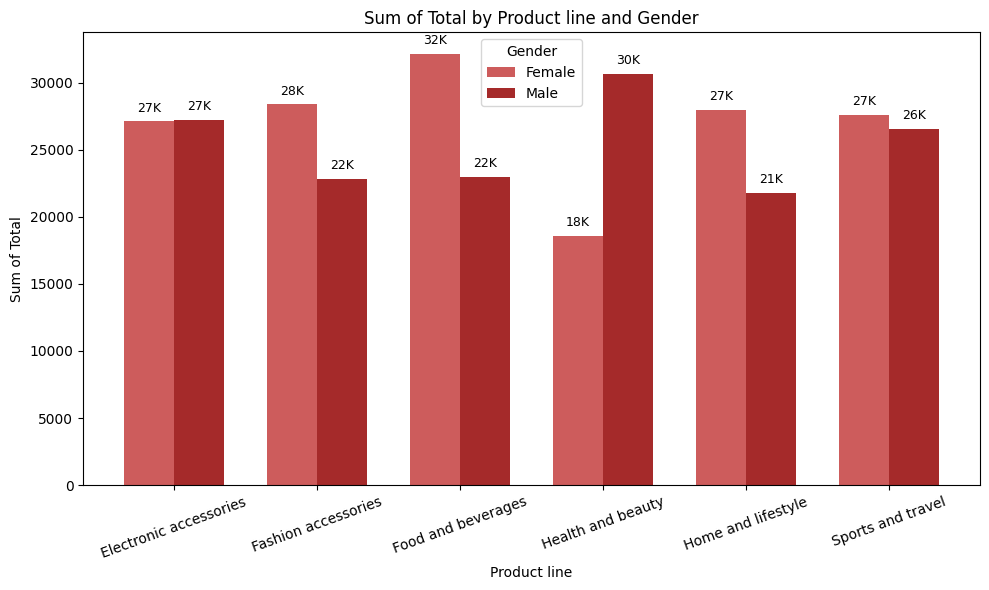

In [920]:
# Step 2: Group by 'Product line' and 'Gender', then sum the 'Total'
grouped = df_cleaned.groupby(['Product line', 'Gender'])['Total'].sum().unstack()

# Step 3: Plot the grouped data
product_lines = grouped.index
x = np.arange(len(product_lines))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, grouped['Female'], width=bar_width, label='Female', color='indianred')
bars2 = ax.bar(x + bar_width/2, grouped['Male'], width=bar_width, label='Male', color='brown')

# Step 4: Add text labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height/1000)}K', ha='center', va='bottom', fontsize=9)

# Step 5: Customize plot
ax.set_title('Sum of Total by Product line and Gender')
ax.set_ylabel('Sum of Total')
ax.set_xlabel('Product line')
ax.set_xticks(x)
ax.set_xticklabels(product_lines, rotation=20)
ax.legend(title='Gender')

plt.tight_layout()
plt.show()

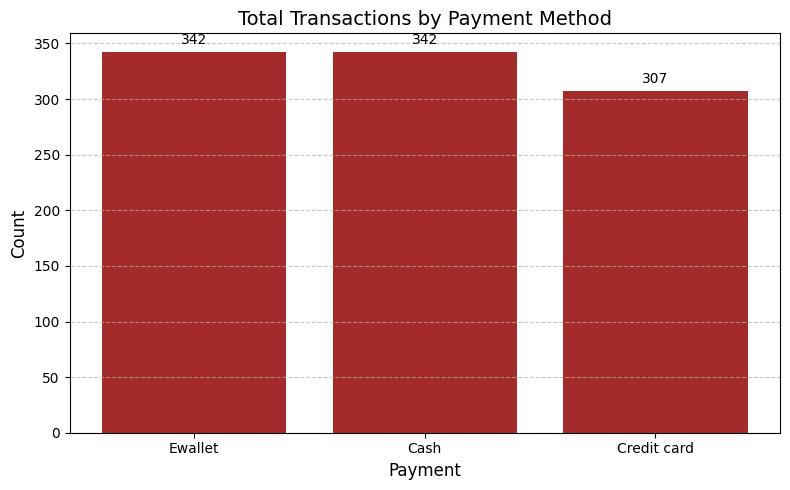

In [921]:
import matplotlib.pyplot as plt

# Count of each payment method
payment_counts = df_cleaned['Payment'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(payment_counts.index, payment_counts.values, color='brown')

# Title and axis labels
plt.title("Total Transactions by Payment Method", fontsize=14)
plt.xlabel('Payment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom')

# Optional: add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


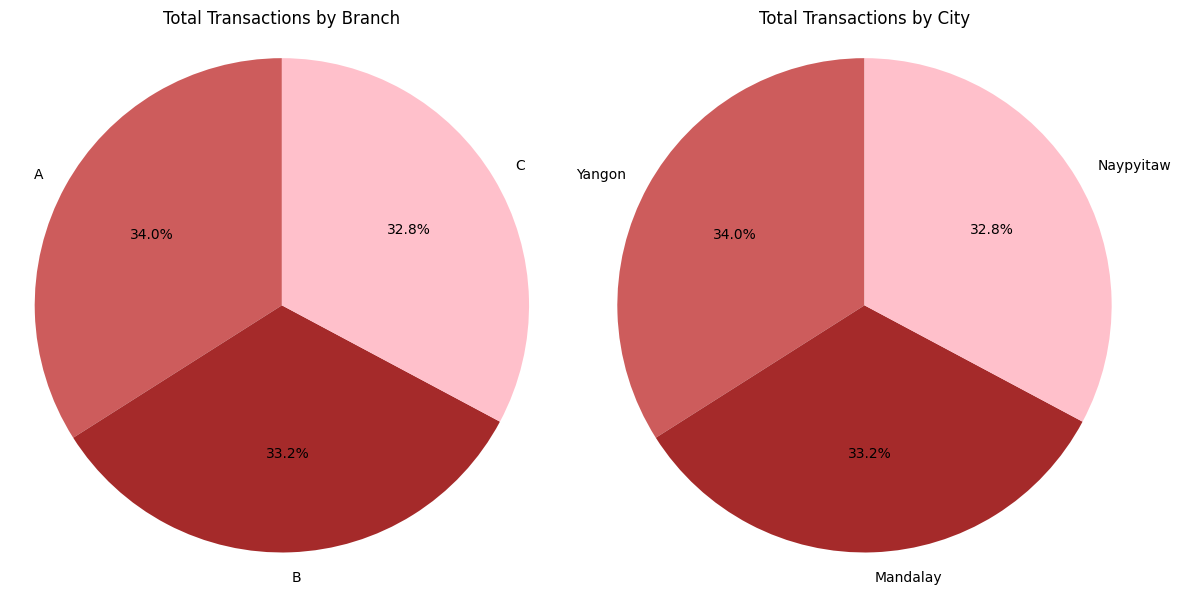

In [922]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Branch
branch_counts = df['Branch'].value_counts()
axs[0].pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=90,colors=['indianred', 'brown','pink'])
axs[0].set_title('Total Transactions by Branch')
axs[0].axis('equal')  # Makes the pie chart a circle

# Pie chart for City
city_counts = df['City'].value_counts()
axs[1].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90,colors=['indianred', 'brown','pink'])
axs[1].set_title('Total Transactions by City')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


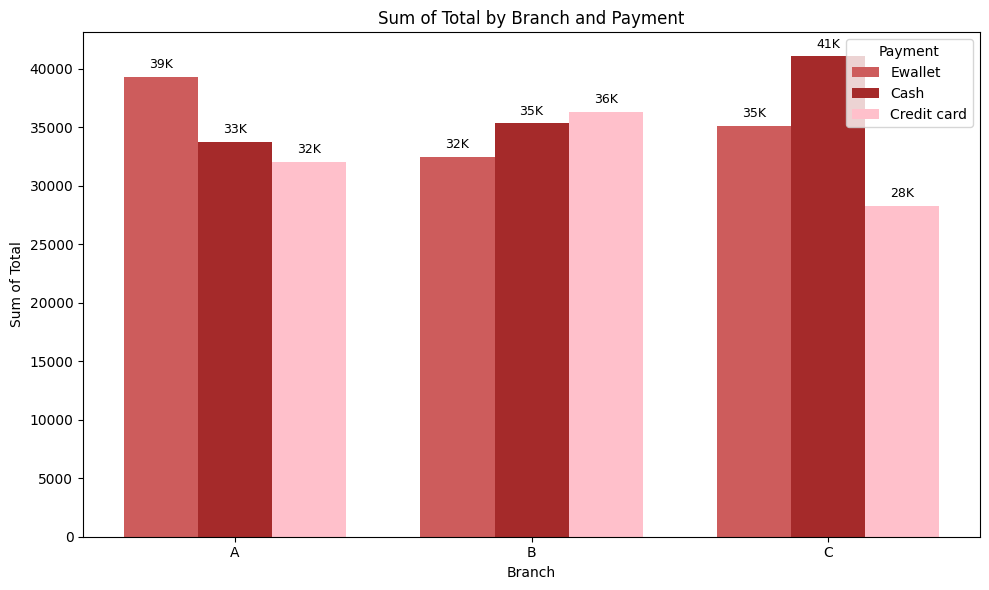

In [923]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by Branch and Payment
grouped = df_cleaned.groupby(['Branch', 'Payment'])['Total'].sum().unstack()

# Setup
branches = grouped.index
x = np.arange(len(branches))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots, spaced out properly
bars1 = ax.bar(x - bar_width, grouped['Ewallet'], width=bar_width, label='Ewallet', color='indianred')
bars2 = ax.bar(x, grouped['Cash'], width=bar_width, label='Cash', color='brown')
bars3 = ax.bar(x + bar_width, grouped['Credit card'], width=bar_width, label='Credit card', color='pink')

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height/1000)}K', ha='center', va='bottom', fontsize=9)

# Customization
ax.set_title('Sum of Total by Branch and Payment')
ax.set_ylabel('Sum of Total')
ax.set_xlabel('Branch')
ax.set_xticks(x)
ax.set_xticklabels(branches)
ax.legend(title='Payment')

plt.tight_layout()
plt.show()


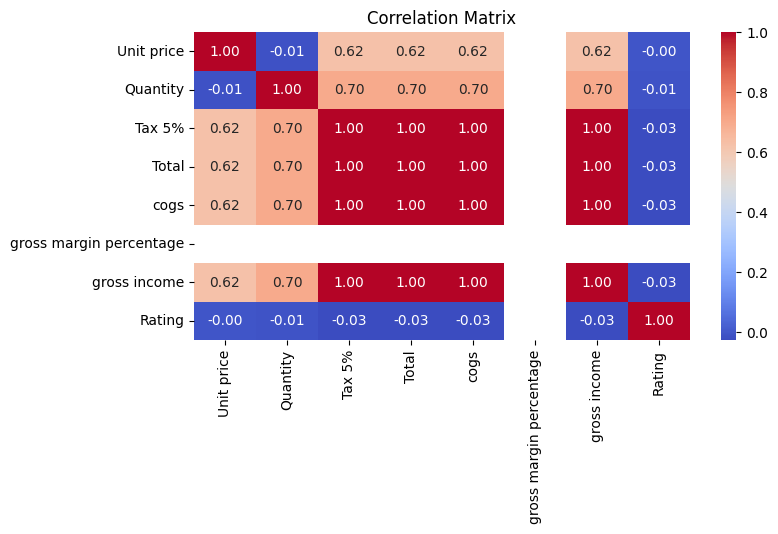

In [924]:
import seaborn as sns
corr_matrix=df_cleaned.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [925]:
np.sort(list(df_cleaned['Rating'].unique()))

array([ 4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,
        5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,
        6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,
        8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,
        9.5,  9.6,  9.7,  9.8,  9.9, 10. ])

In [926]:
print(np.sort(df_cleaned['Rating'].value_counts()))

[ 5  8 11 11 11 12 12 12 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 17 17 17 17 18 18 18 18 18 18 18 18 18 19
 19 19 20 20 20 21 21 21 21 22 22 23 26]


In [927]:
# 5. Convert date/time to useful features
df_cleaned['Day']=df_cleaned['Date'].dt.day
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9,18,2
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2


In [928]:
df_cleaned.drop('Invoice ID',axis='columns', inplace=True)
df_cleaned.drop('Date',axis='columns', inplace=True)
df_cleaned.drop('Time',axis='columns', inplace=True)
df_cleaned.drop('gross income',axis='columns', inplace=True)
df_cleaned.drop('Tax 5%',axis='columns', inplace=True)
df_cleaned.drop('cogs',axis='columns', inplace=True)
df_cleaned.drop('gross margin percentage',axis='columns', inplace=True)
df_cleaned

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating,Day,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,5,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,8,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,3,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,8.4,27,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,5.3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
994,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,63.9975,Ewallet,5.9,18,2
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,Ewallet,6.2,29,1
997,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,Cash,7.7,9,2
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,Cash,4.1,22,2


In [929]:
'''from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_cleaned['Branch']= label_encoder.fit_transform(df_cleaned['Branch']) 
df_cleaned['City']= label_encoder.fit_transform(df_cleaned['City']) 
df_cleaned['Customer type']= label_encoder.fit_transform(df_cleaned['Customer type']) 
df_cleaned['Gender']= label_encoder.fit_transform(df_cleaned['Gender']) 
df_cleaned['Product line']= label_encoder.fit_transform(df_cleaned['Product line'])
df_cleaned['Payment']= label_encoder.fit_transform(df_cleaned['Payment'])'''
df_encoded = pd.get_dummies(df_cleaned)

In [930]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unit price                           991 non-null    float64
 1   Quantity                             991 non-null    int64  
 2   Total                                991 non-null    float64
 3   Rating                               991 non-null    float64
 4   Day                                  991 non-null    int32  
 5   Month                                991 non-null    int32  
 6   Branch_A                             991 non-null    bool   
 7   Branch_B                             991 non-null    bool   
 8   Branch_C                             991 non-null    bool   
 9   City_Mandalay                        991 non-null    bool   
 10  City_Naypyitaw                       991 non-null    bool   
 11  City_Yangon                          

In [931]:
df_encoded

,Unit price,Quantity,Total,Rating,Day,Month,Branch_A,Branch_B,Branch_C,City_Mandalay,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,548.9715,9.1,5,1,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,15.28,5,80.2200,9.6,8,3,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2,46.33,7,340.5255,7.4,3,3,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
3,58.22,8,489.0480,8.4,27,1,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
4,86.31,7,634.3785,5.3,8,2,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,60.95,1,63.9975,5.9,18,2,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
995,40.35,1,42.3675,6.2,29,1,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
997,31.84,1,33.4320,7.7,9,2,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
998,65.82,1,69.1110,4.1,22,2,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [932]:
def classify_rating(rating):
    if rating <= 7.:
        return 'Low'
    else:
        return 'High'

df_encoded['Rating Category'] = df_encoded['Rating'].apply(classify_rating)

In [933]:
df_encoded.drop('Rating',axis='columns', inplace=True)

In [934]:
df_encoded

,Unit price,Quantity,Total,Day,Month,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,...,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating Category
0,74.69,7,548.9715,5,1,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,High
1,15.28,5,80.2200,8,3,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,High
2,46.33,7,340.5255,3,3,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,High
3,58.22,8,489.0480,27,1,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,High
4,86.31,7,634.3785,8,2,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,60.95,1,63.9975,18,2,False,False,True,False,True,...,True,False,False,False,False,False,False,False,True,Low
995,40.35,1,42.3675,29,1,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,Low
997,31.84,1,33.4320,9,2,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,High
998,65.82,1,69.1110,22,2,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,Low


In [935]:
y=df_encoded['Rating Category']
x=df_encoded.drop('Rating Category',axis='columns')
print(x)
print(y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_scaled,y ,random_state=42,test_size=0.25,shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

     Unit price  Quantity     Total  Day  Month  Branch_A  Branch_B  Branch_C  \
0         74.69         7  548.9715    5      1      True     False     False   
1         15.28         5   80.2200    8      3     False     False      True   
2         46.33         7  340.5255    3      3      True     False     False   
3         58.22         8  489.0480   27      1      True     False     False   
4         86.31         7  634.3785    8      2      True     False     False   
..          ...       ...       ...  ...    ...       ...       ...       ...   
994       60.95         1   63.9975   18      2     False     False      True   
995       40.35         1   42.3675   29      1     False     False      True   
997       31.84         1   33.4320    9      2      True     False     False   
998       65.82         1   69.1110   22      2      True     False     False   
999       88.34         7  649.2990   18      2      True     False     False   

     City_Mandalay  City_Na

In [936]:
X_test.shape


(248, 24)

In [937]:
X_train_resampled.shape

(772, 24)

In [938]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Before SMOTE:', y_train.value_counts())
print('After SMOTE:', y_train_resampled.value_counts())


Before SMOTE: Rating Category
High    387
Low     356
Name: count, dtype: int64
After SMOTE: Rating Category
High    387
Low     387
Name: count, dtype: int64


In [939]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

        High       0.48      0.54      0.51       111
         Low       0.59      0.53      0.56       137

    accuracy                           0.54       248
   macro avg       0.54      0.54      0.54       248
weighted avg       0.54      0.54      0.54       248

[[60 51]
 [64 73]]


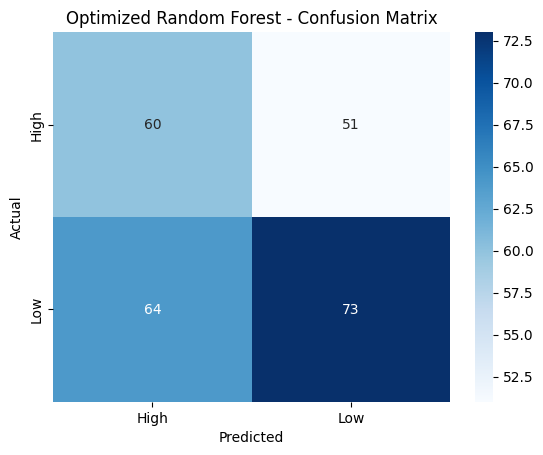

In [947]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_macro',  # Suitable for imbalanced classification
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)


# Predict and evaluate
y_pred_best_rf = grid_search.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['High','Low'],yticklabels=['High','Low'])
plt.title("Optimized Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()